In [1]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import words, wordnet
import re
import pprint

import networkx as nx
import statistics

%matplotlib inline
import matplotlib.pyplot as plt

import json
import pickle
import functools
import operator
from collections import Counter

Given a a body of text, I want to iteratively reduce its entropy/"resolution" in iterative steps, a kind of model for memory (e.g. of a book).  Will probably involve looking at the grammar structure, like NP, and VP and reduce details iteratively.  So essentially working way down a [consituency-based] parse tree. But need do incorporate valence structure as well (good/bad).

To generate sentences, would be a system operating at criticality.

Example: 

(1) John hit the ball --> (2) John hit it --> (3) He hit

Information loss at each step.  Interestingly, the last step is what an outside observer without knowledge/context would describe (someone who doesn't know what a ball is).  So at some point, the sentence becomes separated from its interpretation, or [model](https://plato.stanford.edu/entries/model-theory/).  

Need to identify terminal vs non terminal nodes


Relevant resources probably:
- [Categorizing, tagging words](https://www.nltk.org/book/ch05.html)
- [Extracting info from text (NP, VP etc)](https://www.nltk.org/book/ch07.html)


![alt text](./img/POS-Tags.png)

In [2]:
class Phrase:
    def __init__(self, text, mode='par'):
        if mode == 'par':
            sentences = nltk.sent_tokenize(text) 
            sentences = [nltk.word_tokenize(sent) for sent in sentences] 
            self.tags = [nltk.pos_tag(sent) for sent in sentences]
        if mode == 'sent':
            #maybe not necessary
            sentence = nltk.word_tokenize(text)
            self.tags = nltk.pos_tag(sentence)
    
        grammar = "NP: {<DT>?<JJ>*<NN>}" #look into other grammars
        chunk_rules = nltk.RegexpParser(grammar)
        self.chunks = chunk_rules.parse(self.tags)
        
    def findNP(self):
        """Finds the noun phrase"""
        for word in self.sentence:
            if word in ['The','the']:
                pass
            
    def tempReturn(self):
        return self.chunks 

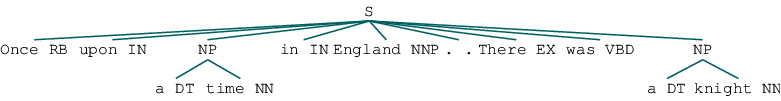

In [3]:
x = Phrase("Once upon a time in England.  There was a knight", mode='sent')
x.tempReturn()

In [4]:
z = x.tempReturn()

In [9]:
str(z)

'(S\n  Once/RB\n  upon/IN\n  (NP a/DT time/NN)\n  in/IN\n  England/NNP\n  ./.\n  There/EX\n  was/VBD\n  (NP a/DT knight/NN))'